In [ ]:
import pandas as pd
import numpy as np

In [ ]:
all_data = pd.read_csv('forest.csv')
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
all_data.shape

(10000, 55)

In [ ]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values


In [ ]:
labels

array([2, 1, 2, ..., 2, 2, 2])

In [ ]:
all_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
dtype: int64

In [ ]:
feature_matrix

array([[2683,  333,   35, ...,    0,    0,    0],
       [2915,   90,    8, ...,    0,    0,    0],
       [2941,  162,    7, ...,    0,    0,    0],
       ...,
       [2693,   21,   11, ...,    0,    0,    0],
       [2536,   42,   11, ...,    0,    0,    0],
       [3109,  261,   10, ...,    0,    0,    0]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# создание модели с указанием гиперпараметра C
clf = LogisticRegression(C=1)
# обучение модели
clf.fit(train_feature_matrix, train_labels)
# предсказание на тестовой выборке
y_pred = clf.predict(test_feature_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred)

0.6075

In [ ]:
from sklearn.model_selection import GridSearchCV
# заново создадим модель, указав солвер
clf = LogisticRegression(solver='saga')

# опишем сетку, по которой будем искать
param_grid = {
    'C': np.arange(1, 5), # также можно указать обычный массив, [1, 2, 3, 4]
    'penalty': ['l1', 'l2'],
}

# создадим объект GridSearchCV
search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')

# запустим поиск
search.fit(feature_matrix, labels)

# выведем наилучшие параметры
print(search.best_params_)

{'C': 3, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
accuracy_score(labels, search.best_estimator_.predict(feature_matrix))

0.6419

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier()


In [ ]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
all_data

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3088,217,21,295,53,2912,194,254,190,1590,...,0,0,0,0,0,0,0,0,0,2
9996,2569,129,10,0,0,1273,237,234,127,5094,...,0,0,0,0,0,0,0,0,0,2
9997,2693,21,11,30,6,2316,212,216,139,2110,...,0,0,0,0,0,0,0,0,0,2
9998,2536,42,11,277,19,323,222,216,128,2844,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
y = all_data['54']
y

0       2
1       1
2       2
3       1
4       2
       ..
9995    2
9996    2
9997    2
9998    2
9999    2
Name: 54, Length: 10000, dtype: int64

In [ ]:
X = all_data.drop(columns='54')
X

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,0
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,0
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,0
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,0
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3088,217,21,295,53,2912,194,254,190,1590,...,1,0,0,0,0,0,0,0,0,0
9996,2569,129,10,0,0,1273,237,234,127,5094,...,0,0,0,0,0,0,0,0,0,0
9997,2693,21,11,30,6,2316,212,216,139,2110,...,0,0,0,0,0,0,0,0,0,0
9998,2536,42,11,277,19,323,222,216,128,2844,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
clf.score(X_test, y_test)



0.7365

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_neighbors': np.arange(1, 11),
    'metric' : ['manhattan', 'euclidean'],
    'weights' : ['uniform', 'distance']
}

clf_grid = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
clf_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
clf_grid.predict_proba


<bound method BaseSearchCV.predict_proba of GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')>

In [ ]:
optimal_clf = KNeighborsClassifier(n_neighbors=4, metric='manhattan', weights='distance' )

In [ ]:
optimal_clf.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

In [ ]:
optimal_clf.score(X_test, y_test)

0.785

In [ ]:
pred_prob = optimal_clf.predict_proba(X_test)

In [ ]:
pred_prob

array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73117861, 0.26882139, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.27814042, 0.72185958, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.54264548, 0.        , 0.        , ..., 0.        , 0.        ,
        0.45735452]])

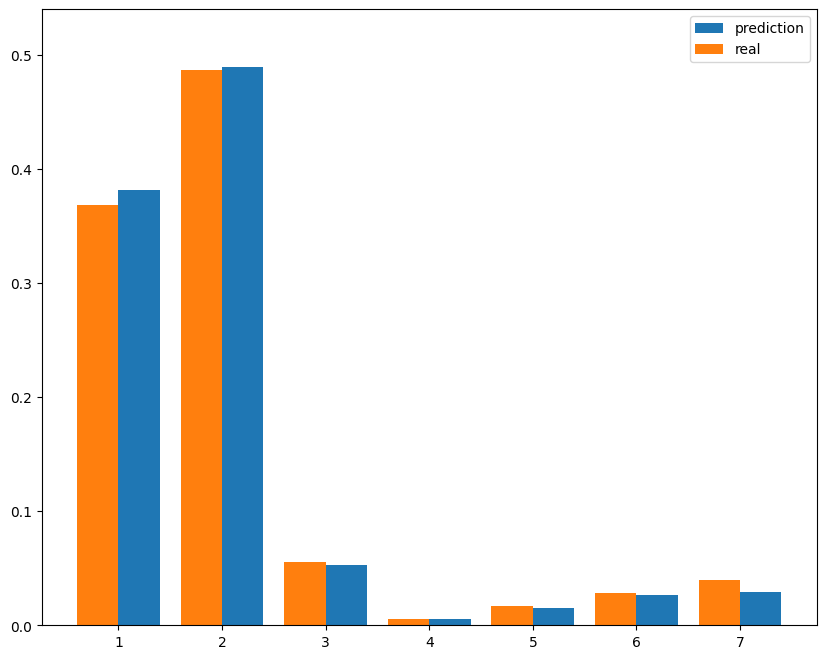

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels),freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()

In [ ]:
pred_freq

array([0.38149113, 0.48914852, 0.05281153, 0.00581434, 0.01521326,
       0.02623053, 0.02929069])